# Performance counter studies

I have implemented a mechanism in RPython to read the performance counters using [PAPI](http://icl.utk.edu/papi/). See [here](https://github.com/cornell-brg/pypy/blob/iiswc/rpython/rlib/pyxcel/hook.py#L99-L263) on how I integrated PAPI in RPython. So far, I ran this on benchmarks game on PyPy (benchmarks with `.python` extension) and Pycket (benchmarks with `.racket` extension) only. The goal is to get performance counters from non-RPython interpreters and languages as well. Also note that the phase breakdowns right now have a bug, making them not very useful. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [3]:
# Runs that finished normally:
valid_runs = ["binarytrees.python", "binarytrees.python-2.python",
"binarytrees.python-21.python", "binarytrees.racket",
"binarytrees.racket-2.racket", "fannkuchredux.python-4.python",
"fannkuchredux.python-6.python", "fannkuchredux.racket",
"fannkuchredux.racket-2.racket", "fasta.python", "fasta.python-2.python",
"fasta.python-3.python", "fasta.python-21.python", "fasta.racket",
"fasta.racket-3.racket", "knucleotide.python-21.python",
"mandelbrot.racket", "mandelbrot.racket-2.racket",
"mandelbrot.racket-3.racket", "meteor.python", "meteor.python-2.python",
"meteor.python-3.python", "meteor.python-21.python",
"meteor.python-22.python", "meteor.python-23.python", "meteor.racket",
"meteor.python", "nbody.python", "nbody.python-2.python",
"nbody.python-21.python", "nbody.racket", "nbody.racket-2.racket",
"pidigits.python-2.python", "pidigits.python-21.python",
"pidigits.python-22.python", "pidigits.python-23.python",
"pidigits.python-24.python", "pidigits.racket",
"regexdna.python-5.python", "regexdna.python-25.python",
"revcomp.python-4.python", "revcomp.python-6.python",
"revcomp.python-23.python", "revcomp.python-24.python",
"revcomp.python-25.python", "revcomp.racket", "revcomp.racket-2.racket",
"spectralnorm.python-6.python", "spectralnorm.python-22.python",
"spectralnorm.python-26.python", "spectralnorm.python-28.python",
"spectralnorm.racket", "spectralnorm.racket-2.racket",
"threadring.python-21.python"]

In [167]:
# Load all valid runs.
df = pd.DataFrame()
files = os.listdir( "perf_out" )
for run in valid_runs:
    if "{}.csv".format(run) not in files:
        continue
    tmp_df = pd.read_csv( "perf_out/{}.csv".format(run) )
    tmp_df["run"] = run
    df = df.append( tmp_df, ignore_index=True )
    

In [5]:
df

,mode,phase,cyc,ins,br,brc,brcm,count,run
0,sum,10,632048,368955,77415,57394,4017,2,binarytrees.python
1,sum,110,42208300,21222443,4690846,2598550,232252,27909,binarytrees.python
2,sum,111,22046535,11517072,2617580,1419586,187535,24118,binarytrees.python
3,sum,112,13353987,4403846,866515,488950,56377,2334,binarytrees.python
4,sum,120,9615987028,14248066511,3604397204,3052606618,80506033,617,binarytrees.python
5,sum,121,2132639566,2477938729,262064146,249028618,910920,617,binarytrees.python
6,sum,122,10628623596,15202473848,3360629353,2639015348,57886388,16112,binarytrees.python
7,sum,123,48827361230,62701157754,6683022586,6390087670,15351158,16112,binarytrees.python
8,sum,130,12867693,10873921,2220800,1601423,100424,5,binarytrees.python
9,sum,131,55629,9317,2153,1178,377,5,binarytrees.python


In [202]:
def plot_time_breakdown( app_name ):
    tmp_df = df[ df.run == app_name ]
    tmp_df = tmp_df[ tmp_df["mode"] == "sample" ]

    #tmp_df["ipc"] = tmp_df.ins / tmp_df.cyc
    tmp_df["cum_cyc"] = tmp_df["cyc"].cumsum()
    tmp_df["cum_ins"] = tmp_df["ins"].cumsum()
    
    phase_list = ["i"]
    # Replays the phases and returns the current phase.
    def replay_phases( r ):
        end_phase = phase_list[-1]
        if r.phase in phase_begins:
            phase = phase_begins[ r.phase ]
            phase_list.append( phase )
        elif r.phase in phase_ends:
            phase = phase_ends[ r.phase ]
            popped = phase_list.pop()
            assert popped == phase, "popped: {} != phase: {}. phase_list: {}".format( popped, phase, phase_list )
        return end_phase
    
    tmp_df["curr_phase"] = tmp_df.apply( replay_phases, axis=1 )
    tmp_df["curr_phase_num"] = tmp_df.apply( lambda r : phase_nums[ r.curr_phase ], axis=1 )
    
    total_cyc = tmp_df.iloc[-1].cum_cyc
    
    # Create sample points.
    num_plot_samples = 500
    plot_df = pd.DataFrame( columns=[ "cum_cyc", "cum_ins" ] )
    plot_df = plot_df.astype( int )

    for i in map( lambda x : np.searchsorted( tmp_df["cum_cyc"], x )[0],
                  range( 0, total_cyc, total_cyc/num_plot_samples ) ):

        sample = tmp_df.iloc[i]
        plot_df = plot_df.append( {"cum_cyc" : int(sample.cum_cyc),
                                   "cum_ins" : int(sample.cum_ins),
                                   "cat"     : int(sample.curr_phase_num) },
                                  ignore_index=True )

    plot_df["cyc"] = plot_df.cum_cyc.diff()
    plot_df["ins"] = plot_df.cum_ins.diff()
    plot_df["ipc"] = plot_df.ins / plot_df.cyc
    
    # plot
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    
    plot_df.plot( kind="line", x="cum_ins", y="ipc", figsize=(8,3), ax=ax1 )
    
    # Create sample points.
    num_plot_samples = 5000
    plot_df = pd.DataFrame( columns=[ "cum_ins", "cat"] )
    plot_df = plot_df.astype( int )

    for i in map( lambda x : np.searchsorted( tmp_df["cum_cyc"], x )[0],
                  range( 0, total_cyc, total_cyc/num_plot_samples ) ):

        sample = tmp_df.iloc[i]
        plot_df = plot_df.append( {"cum_ins" : int(sample.cum_ins),
                                   "cat"     : int(sample.curr_phase_num) },
                                  ignore_index=True )

    
    categories = ["interp", "gc", "tracing", "blackhole", "jit"]
    ax2.set_yticklabels( [""] + categories )
    line_width = 200.0 / num_plot_samples
    plot_df.plot( kind="scatter", x="cum_ins", y="cat",
                      c="black", xlim=0, marker=".", s=10, lw=line_width,
                      ax=ax2, figsize=(8,5) )
    #return tmp_df


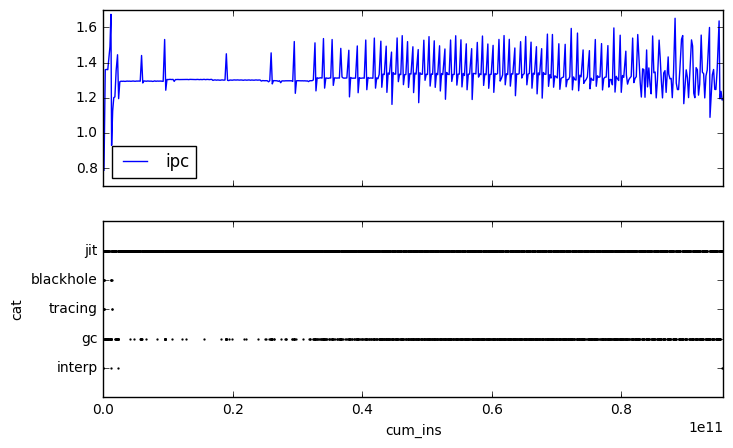

In [203]:
plot_time_breakdown( "binarytrees.python" )

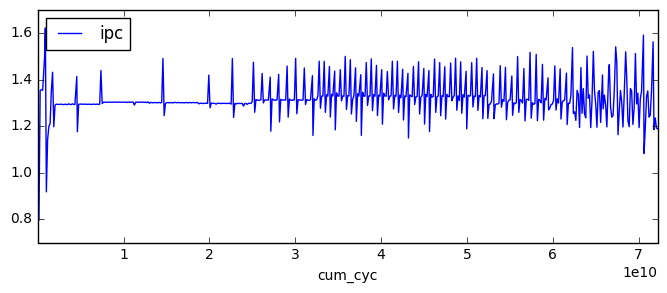

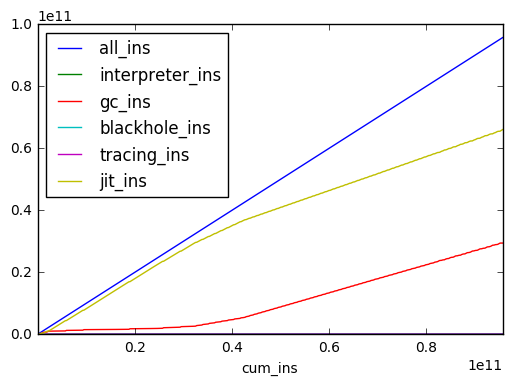

In [148]:
tmp_df = plot_time_breakdown( "binarytrees.python" )
plot_phases( tmp_df )

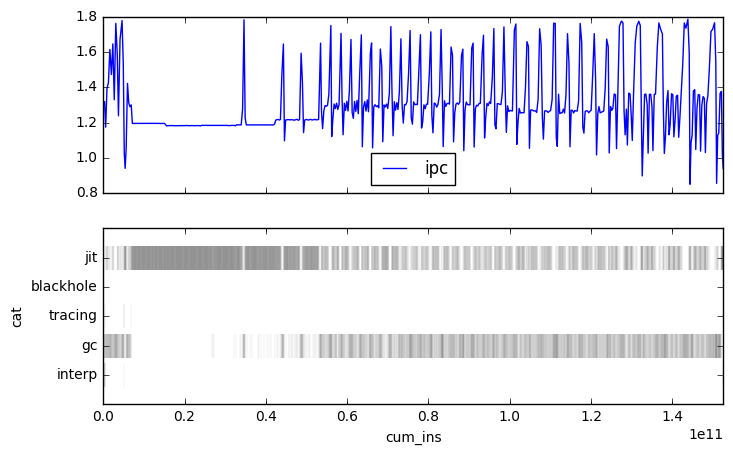

In [195]:
plot_time_breakdown( "binarytrees.racket" )

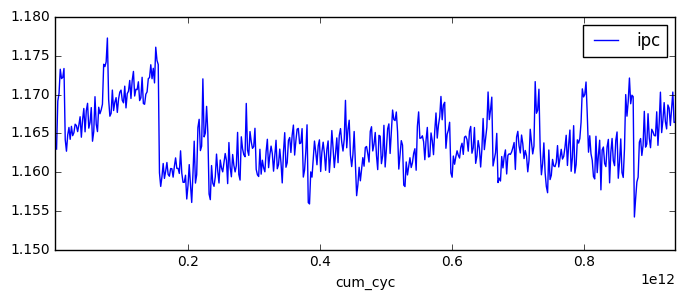

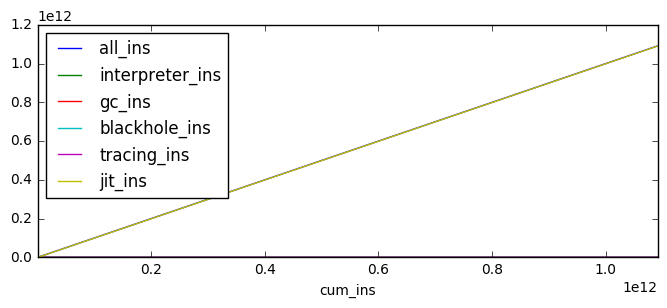

In [159]:
tmp_df = plot_time_breakdown( "fannkuchredux.racket-2.racket" )
plot_phases( tmp_df )

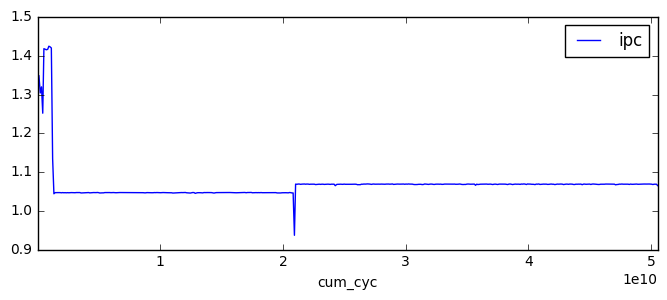

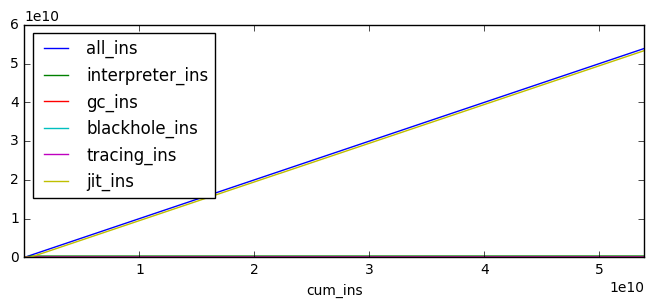

In [161]:
tmp_df = plot_time_breakdown( "fasta.racket-3.racket" )
plot_phases( tmp_df )

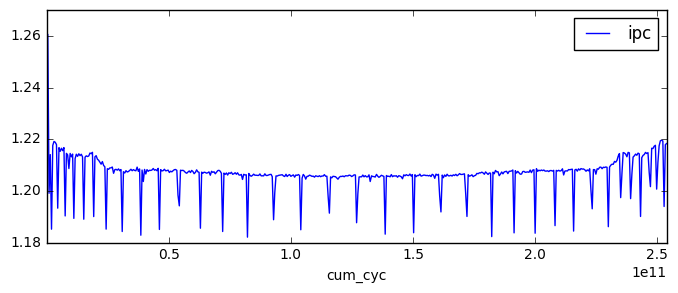

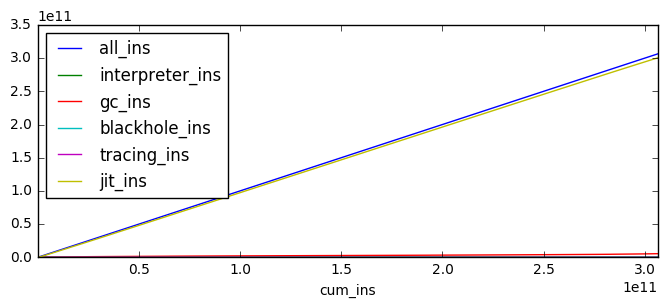

In [162]:
tmp_df = plot_time_breakdown( "mandelbrot.racket" )
plot_phases( tmp_df )


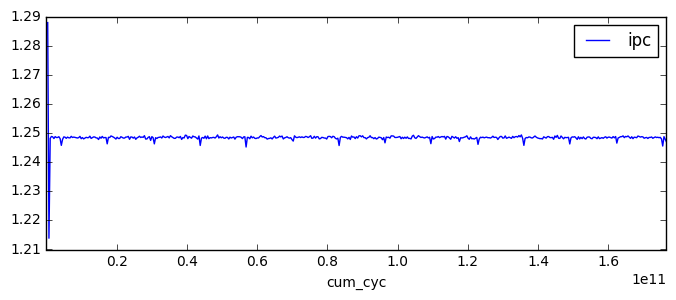

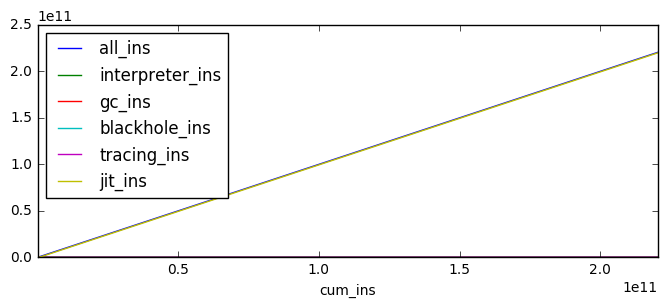

In [163]:
tmp_df = plot_time_breakdown( "nbody.racket" )
plot_phases( tmp_df )

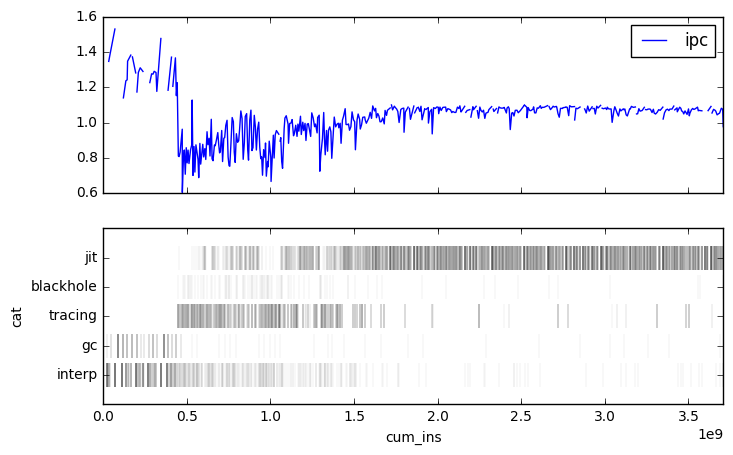

In [196]:
plot_time_breakdown( "meteor.racket" )

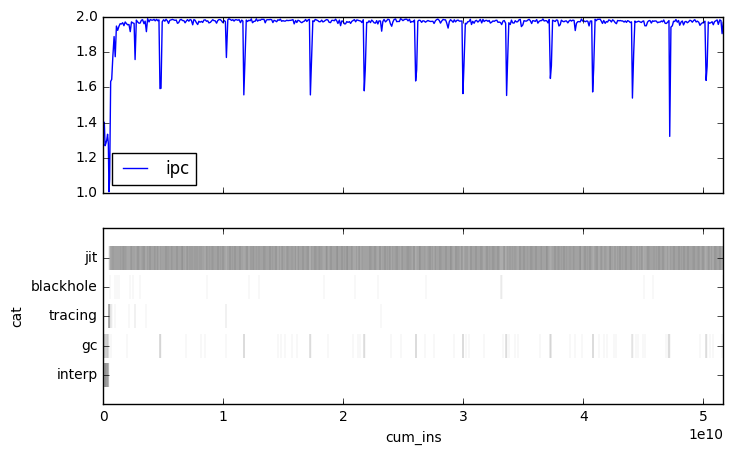

In [198]:
plot_time_breakdown( "pidigits.racket" )

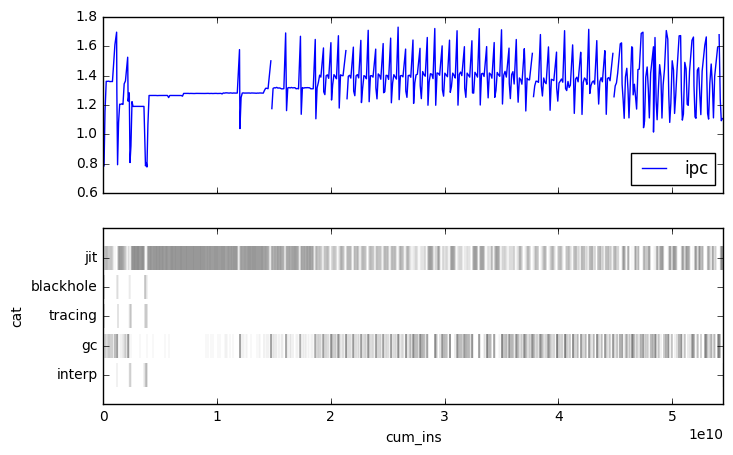

In [197]:
plot_time_breakdown( "binarytrees.python-2.python" )

In [153]:
df[ df.run == "binarytrees.python-2.python" ]

,mode,phase,cyc,ins,br,brc,brcm,count,run
139058,sum,10,624279,368992,77310,57305,4030,2,binarytrees.python-2.python
139059,sum,110,89975671,50892607,11280329,6149254,420195,73618,binarytrees.python-2.python
139060,sum,111,61729351,33011334,7423348,4002181,457229,69800,binarytrees.python-2.python
139061,sum,112,13845545,6521972,1252108,729371,52665,3798,binarytrees.python-2.python
139062,sum,120,7549535452,11394672617,2870418844,2426451770,60367513,498,binarytrees.python-2.python
139063,sum,121,1839072979,2015900755,222839668,214674729,510374,498,binarytrees.python-2.python
139064,sum,122,8497605343,13257840643,2927735155,2299588577,49038609,7016,binarytrees.python-2.python
139065,sum,123,21951364690,27247953718,3025678521,2915599550,4754086,7016,binarytrees.python-2.python
139066,sum,130,27862532,25769012,5352479,3738557,186053,9,binarytrees.python-2.python
139067,sum,131,68359,13289,3000,1781,470,9,binarytrees.python-2.python


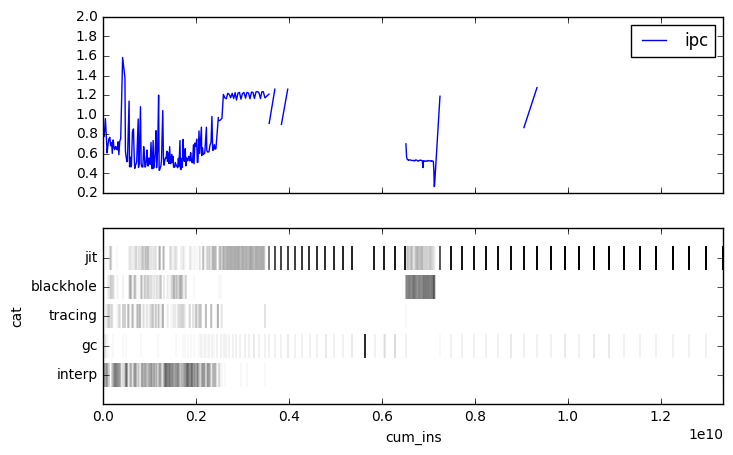

In [199]:
plot_time_breakdown( "pidigits.python-2.python" )

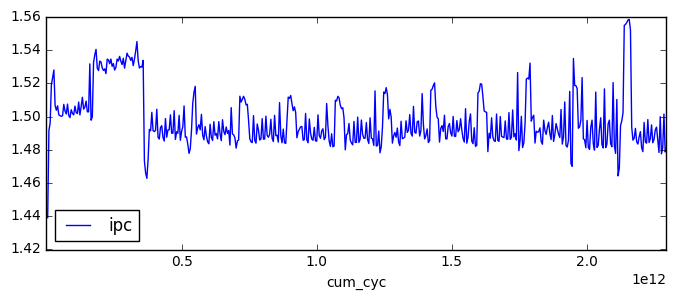

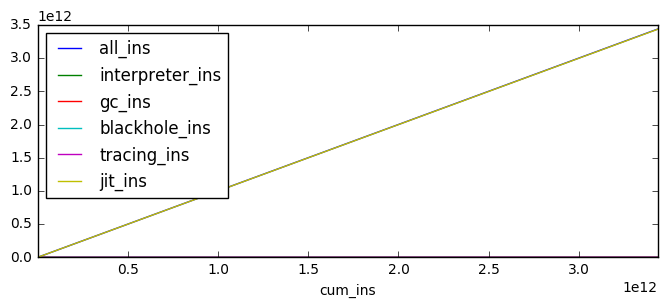

In [170]:
tmp_df = plot_time_breakdown( "fannkuchredux.python-4.python" )
plot_phases( tmp_df )

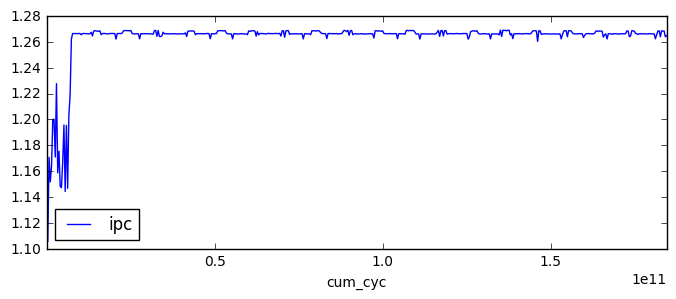

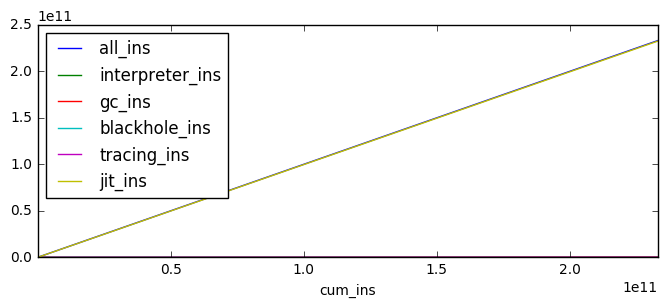

In [172]:
tmp_df = plot_time_breakdown( "spectralnorm.python-6.python" )
plot_phases( tmp_df )

In [175]:
phase_begins = {
    110: "b",
    120: "G",
    122: "g",
    130: "t",
    132: "T",
    160: "j",
}
phase_ends = {
    111: "b",
    112: "b",
    113: "b",
    121: "G",
    123: "g",
    131: "t",
    133: "T",
    161: "j",
}
phase_nums = {
    "i": 0,
    "g": 1,
    "G": 1,
    "t": 2,
    "T": 2,
    "b": 3,
    "j": 4,
}

def plot_phases( tmp_df ):
    phase_list = ["i"]
    # Replays the phases and returns the current phase.
    def replay_phases( r ):
        end_phase = phase_list[-1]
        if r.phase in phase_begins:
            phase = phase_begins[ r.phase ]
            phase_list.append( phase )
        elif r.phase in phase_ends:
            phase = phase_ends[ r.phase ]
            popped = phase_list.pop()
            assert popped == phase, "popped: {} != phase: {}. phase_list: {}".format( popped, phase, phase_list )
        return end_phase
    
    tmp_df["curr_phase"] = tmp_df.apply( replay_phases, axis=1 )
    tmp_df["curr_phase_num"] = tmp_df.apply( lambda r : phase_nums[ r.curr_phase ], axis=1 )

    def get_phase_insts( phases ):
        inst_cnt = [0]
        if not isinstance( phases, list ):
            phases = [ phases ]
        def phase_insts( r ):
            #inst_cnts[ r.curr_phase ] += inst_cnts.get( r.curr_phase, 0 )
            if r.curr_phase in phases:
                inst_cnt[0] += r.ins
            return inst_cnt[0]
        return phase_insts

    if False: 
        tmp_df[ "interpreter_ins" ] = tmp_df.apply( get_phase_insts("i"), axis=1 )
        tmp_df[ "blackhole_ins" ] = tmp_df.apply( get_phase_insts("b"), axis=1 )
        tmp_df[ "gc_ins" ] = tmp_df.apply( get_phase_insts(["g", "G"]), axis=1 )
        #tmp_df[ "gc_major_ins" ] = tmp_df.apply( get_phase_insts("G"), axis=1 )
        #tmp_df[ "gc_minor_ins" ] = tmp_df.apply( get_phase_insts("g"), axis=1 )
        tmp_df[ "tracing_ins" ] = tmp_df.apply( get_phase_insts(["t", "T"]), axis=1 )
        #tmp_df[ "tracing_ins" ] = tmp_df.apply( get_phase_insts("t"), axis=1 )
        #tmp_df[ "tracing_gf_ins" ] = tmp_df.apply( get_phase_insts("T"), axis=1 )
        tmp_df[ "jit_ins" ] = tmp_df.apply( get_phase_insts("j"), axis=1 )
        tmp_df[ "all_ins" ] = tmp_df.cum_ins

        tmp_df.plot( kind="line", x="cum_ins", y=[ "all_ins", "interpreter_ins", "gc_ins", "blackhole_ins", 
                                              "tracing_ins", "jit_ins"], figsize=(8, 3) )
    
    return tmp_df

In [177]:
tmp_df

,mode,phase,cyc,ins,br,brc,brcm,count,run,cum_cyc,cum_ins,curr_phase,interpreter_ins,blackhole_ins,gc_ins,tracing_ins,jit_ins,all_ins,curr_phase_num
18712172,sample,10,12841,5854,1378,991,110,0,spectralnorm.python-6.python,12841,5854,i,5854,0,0,0,0,5854,0
18712173,sample,150,622188,361453,75194,55975,3930,1,spectralnorm.python-6.python,635029,367307,i,367307,0,0,0,0,367307,0
18712174,sample,151,9365,507,141,82,38,2,spectralnorm.python-6.python,644394,367814,i,367814,0,0,0,0,367814,0
18712175,sample,150,29802,3384,920,742,147,3,spectralnorm.python-6.python,674196,371198,i,371198,0,0,0,0,371198,0
18712176,sample,151,2771,502,128,74,19,4,spectralnorm.python-6.python,676967,371700,i,371700,0,0,0,0,371700,0
18712177,sample,150,136329,34558,9266,6892,1000,5,spectralnorm.python-6.python,813296,406258,i,406258,0,0,0,0,406258,0
18712178,sample,151,3609,503,133,70,21,6,spectralnorm.python-6.python,816905,406761,i,406761,0,0,0,0,406761,0
18712179,sample,150,161492,35530,9118,7113,924,7,spectralnorm.python-6.python,978397,442291,i,442291,0,0,0,0,442291,0
18712180,sample,151,2115,501,122,70,11,8,spectralnorm.python-6.python,980512,442792,i,442792,0,0,0,0,442792,0
18712181,sample,150,49921,19493,4580,3201,304,9,spectralnorm.python-6.python,1030433,462285,i,462285,0,0,0,0,462285,0


In [176]:
tmp_df = plot_phases( tmp_df )

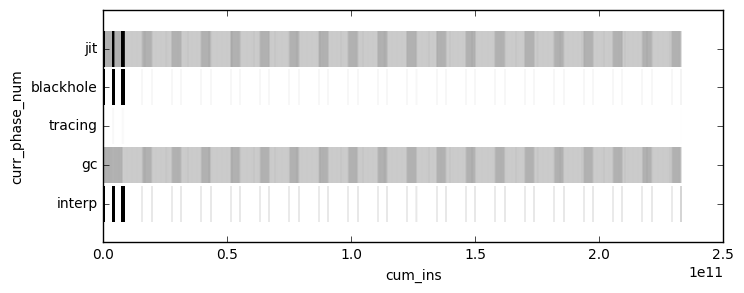

In [180]:
fig, ax = plt.subplots()
categories = ["interp", "gc", "tracing", "blackhole", "jit"]
ax.set_yticklabels( [""] + categories )
line_width = 300.0 / len( tmp_df )
ax = tmp_df.plot( kind="scatter", x="cum_ins", y="curr_phase_num",
                  c="black", xlim=0, marker="|", s=700, lw=line_width,
                  ax=ax, figsize=(8,3) )

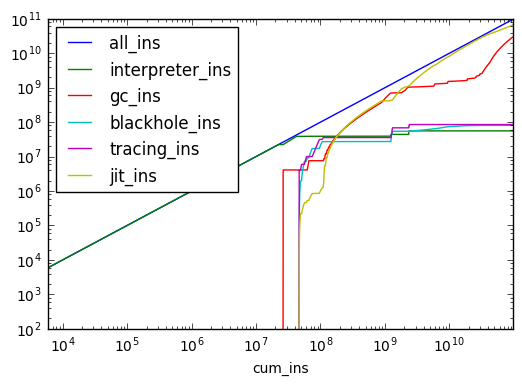

In [133]:
tmp_df["all_ins"] = tmp_df.cum_ins
tmp_df.plot( kind="line", x="cum_ins", y=[ "all_ins", "interpreter_ins", "gc_ins", "blackhole_ins",
                                          "tracing_ins", "jit_ins"], loglog=True )

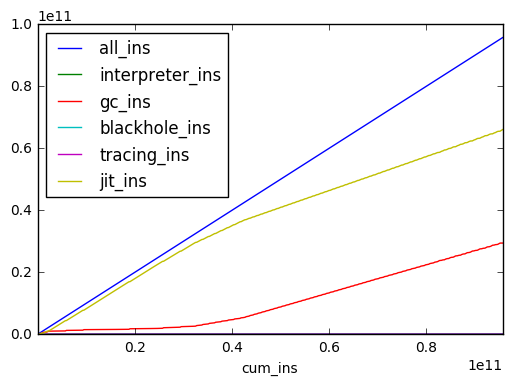

In [134]:
tmp_df.plot( kind="line", x="cum_ins", y=[ "all_ins", "interpreter_ins", "gc_ins", "blackhole_ins", 
                                          "tracing_ins", "jit_ins"] )

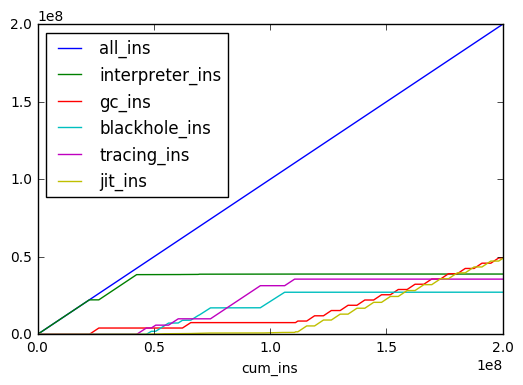

In [135]:
tmp_df.plot( kind="line", x="cum_ins", y=[ "all_ins", "interpreter_ins", "gc_ins", "blackhole_ins", 
                                          "tracing_ins", "jit_ins"], xlim=[0,2e8], ylim=[0, 2e8] )

In [9]:
# Phase names
phase_names = {
0     : "UNKNOWN", 
10    : "INIT", 
       
80    : "JIT_LABEL", 
81    : "JIT_GUARD_FAILURE", 
82    : "JIT_GUARD_FAILURE_BRIDGE", 
83    : "JIT_CALL", 
84    : "JIT_CALL_RETURN", 
85    : "JIT_FINISH", 
       
90    : "JIT_CALL_FRAME_REALLOC", 
91    : "JIT_CALL_FRAME_REALLOC_RETURN", 
92    : "JIT_CALL_REALLOC_FRAME_CRASH", 
93    : "JIT_CALL_REALLOC_FRAME_CRASH_RETURN", 
94    : "JIT_CALL_STACK_CHECK", 
95    : "JIT_CALL_STACK_CHECK_RETURN", 
96    : "JIT_CALL_WRITE_BARRIER", 
97    : "JIT_CALL_WRITE_BARRIER_RETURN", 
98    : "JIT_COND_CALL", 
99    : "JIT_COND_CALL_RETURN", 
100   : "JIT_CALL_MALLOC", 
101   : "JIT_CALL_MALLOC_RETURN", 
102   : "JIT_CALL_SET_LAST_ERROR", 
103   : "JIT_CALL_SET_LAST_ERROR_RETURN", 
104   : "JIT_CALL_GET_LAST_ERROR", 
105   : "JIT_CALL_GET_LAST_ERROR_RETURN", 
106   : "JIT_CALL_REACQGIL", 
107   : "JIT_CALL_REACQGIL_RETURN", 
       
110   : "BLACKHOLE_START", 
111   : "BLACKHOLE_STOP_LEAVE_FRAME", 
112   : "BLACKHOLE_STOP_JITEXC", 
       
120   : "GC_MAJOR_START", 
121   : "GC_MAJOR_STOP", 
122   : "GC_MINOR_START", 
123   : "GC_MINOR_STOP", 
       
130   : "TRACING_START", 
131   : "TRACING_STOP", 
132   : "TRACING_START_GUARD_FAILURE", 
133   : "TRACING_STOP_GUARD_FAILURE", 
       
140   : "JITEXC_CONTINUE_RUNNING_NORMALLY", 
141   : "JITEXC_DONE_WITH_THIS_FRAME", 
142   : "JITEXC_EXIT_FRAME_WITH_EXCEPTION", 
143   : "JITEXC_ENTER_JIT_ASSEMBLER", 
       
150   : "PORTAL_ENTRANCE", 
151   : "PORTAL_EXIT", 
       
160   : "EXECUTE_TOKEN", 
161   : "EXECUTE_TOKEN_RETURN", 
       
170   : "FORCE_START", 
171   : "FORCE_STOP", 
}

In [12]:
# Add phase names to df.
df = df.assign( phase_name=df.apply( lambda r: phase_names[r.phase], axis=1 ))

In [13]:
# Do a quick groupby to see the how each of these compare.
df.groupby( ["phase_name"] ).sum()

,phase,cyc,ins,br,brc,brcm
phase_name,,,,,,
BLACKHOLE_START,5940,8577540295,7232563452,1335877304,984123477,34412974
BLACKHOLE_STOP_JITEXC,6048,3312721943,1637119013,324163701,209485845,13875316
BLACKHOLE_STOP_LEAVE_FRAME,5994,3536406915,1774686461,426496150,228617144,28499792
EXECUTE_TOKEN,8640,312725180838,359386576306,49105529792,42572100579,649428141
EXECUTE_TOKEN_RETURN,8694,34072782647,42632845676,8070420751,5947654756,162429071
GC_MAJOR_START,3840,164093903573,254245480133,61646561185,53306174949,980288289
GC_MAJOR_STOP,3872,121869718438,153090339989,23497986013,20508724691,93826517
GC_MINOR_START,6588,241055332561,399230956741,95138126218,77289269974,951272564
GC_MINOR_STOP,6642,9779836152826,12927155565165,1868419373731,1571320185364,35308705918


In [39]:
df[df.run == "binarytrees.racket"]

,phase,cyc,ins,br,brc,brcm,run,phase_name
57,10,3087843,3229917,741700,529671,31625,binarytrees.racket,INIT
58,110,11784450,6326306,1532519,883292,69030,binarytrees.racket,BLACKHOLE_START
59,111,3725429,1930432,461923,248161,26514,binarytrees.racket,BLACKHOLE_STOP_LEAVE_FRAME
60,112,14994111,8726413,1940282,1222292,85164,binarytrees.racket,BLACKHOLE_STOP_JITEXC
61,120,21078199976,32503591664,8158778290,7360725143,166684601,binarytrees.racket,GC_MAJOR_START
62,121,9276023656,9959057746,1461129181,1390819388,9475568,binarytrees.racket,GC_MAJOR_STOP
63,122,26809085919,40609334030,9619297882,7640117496,163351946,binarytrees.racket,GC_MINOR_START
64,123,59912550980,69042488272,10217046823,9714159812,57831034,binarytrees.racket,GC_MINOR_STOP
65,130,24988862,20568335,4509615,3147401,236991,binarytrees.racket,TRACING_START
66,131,232650,41965,11388,7132,1706,binarytrees.racket,TRACING_STOP


## Phase breakdown

As you can see above, most time is occupied by `GC_MINOR_STOP`. This is because the stat collection using PAPI is very simplistic right now and records the stats since the last event. In this case, `GC_MINOR` event might have been called from different places (from the interpreter, from the tracing step, from the blackhole, or from the JIT-ed code). So I need to make this a bit smarter, sort of like a stack that remembers the phase that we were before we saw `GC_MINOR_START`. I implemented something similar in Pin, but a light-weight version of this is necessary for the PAPI analysis too.

Also note that there are no JIT-related events (`JIT_LABEL` etc) above. I still need to implement this separately.

## Overall execution performance counter statistics

Even though the breakdown has some bugs right now, we can sum all the performance counters across different phases, and this can give us overall useful information regarding IPC, branches / inst, and branch miss rate.

In [15]:
byrun_df = df.groupby(["run"]).sum()

In [31]:
# IPC:
byrun_df["ipc"] = byrun_df[" ins"] / byrun_df[" cyc"]
# Branch rate:
byrun_df["br_rate"] = byrun_df[" brc"] / byrun_df[" ins"]
# Branch misprediction rate:
byrun_df["br_mispred_rate"] = byrun_df[" brcm"] / byrun_df[" brc"]
# Branch mispredictions per instruction:
byrun_df["br_mispred_per_inst"] = byrun_df[" brcm"] / byrun_df[" ins"]

In [32]:
byrun_df

,phase,cyc,ins,br,brc,brcm,ipc,br_rate,br_mispred_rate,br_mispred_per_inst
run,,,,,,,,,,
binarytrees.python,2401,71834672265,95714093384,14020336988,12430374706,139407962,1.332422,0.129870,0.011215,0.001457
binarytrees.python-2.python,2401,40090363342,54472629303,9136830799,7920707180,103202181,1.358746,0.145407,0.013029,0.001895
binarytrees.python-21.python,2401,305670066025,430596064893,77806991925,66262739211,767441446,1.408696,0.153886,0.011582,0.001782
binarytrees.racket,2120,117472496151,152538150318,29537038648,26169316476,399641091,1.298501,0.171559,0.015271,0.002620
binarytrees.racket-2.racket,2120,195327921810,264174111956,48775549378,42982908593,478913203,1.352465,0.162707,0.011142,0.001813
fannkuchredux.python-4.python,2401,2364170712399,3435789426310,541428659350,428817762172,16504529588,1.453275,0.124809,0.038488,0.004804
fannkuchredux.python-6.python,2019,1268643120122,1816427048631,307432309527,248372613687,10516842040,1.431787,0.136737,0.042343,0.005790
fannkuchredux.racket,1879,1048850845675,1212718717598,167158475859,154995575692,2892231742,1.156236,0.127808,0.018660,0.002385
fannkuchredux.racket-2.racket,1879,938197580474,1091195763679,154196371704,142512063848,2556122415,1.163077,0.130602,0.017936,0.002342


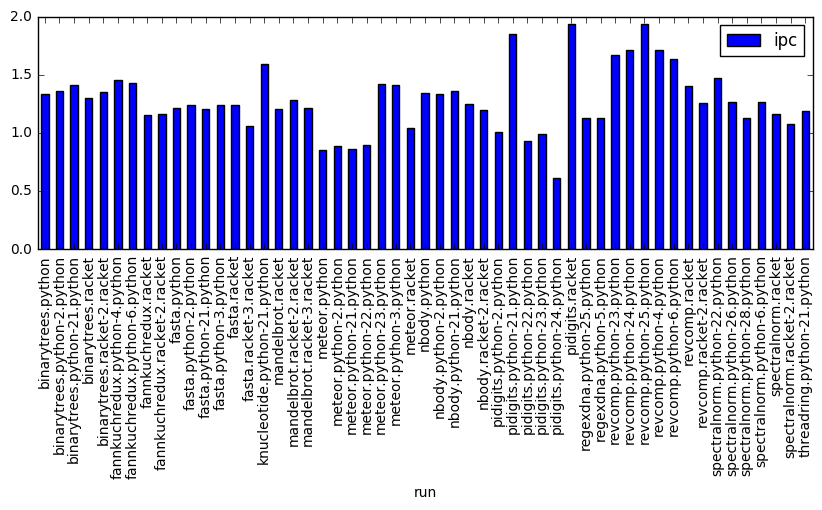

In [35]:
# Plot IPC
byrun_df.plot(kind="bar", y="ipc", figsize=(10,3) )

This is interesting as IPC is a bit lower than expected. Also note that there isn't as much variation across different benchmarks. And interestingly there isn't much difference between PyPy and Pycket. It'll be interesting to compare these to non-RPython programs such as CPython and GCC (will come later). Also interesting is `pidigits` is especially low IPC. Once I fix the breakdowns, I suspect this is due to `pidigits` spending a lot of its time in external calls.

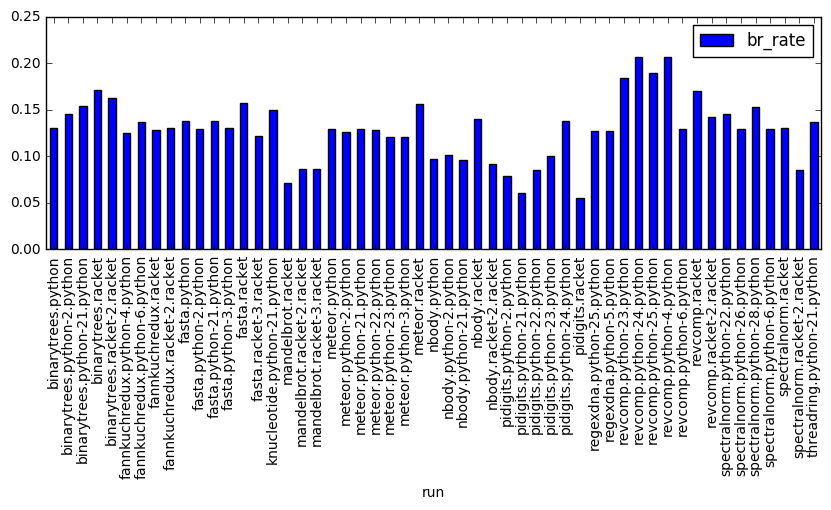

In [36]:
# Plot branch rate
byrun_df.plot(kind="bar", y="br_rate", figsize=(10,3) )

Again, not a huge variation across different benchmarks and languages.

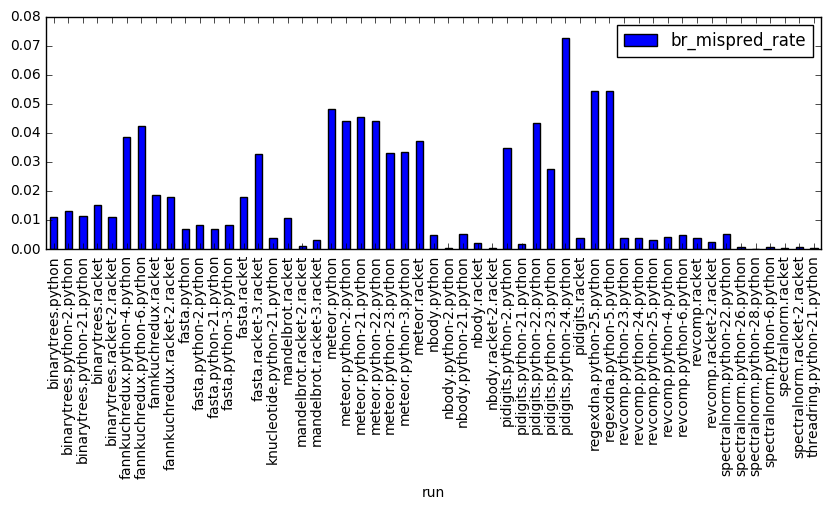

In [37]:
# Plot branch misprediction rate
byrun_df.plot(kind="bar", y="br_mispred_rate", figsize=(10,3) )

This is much more varied.

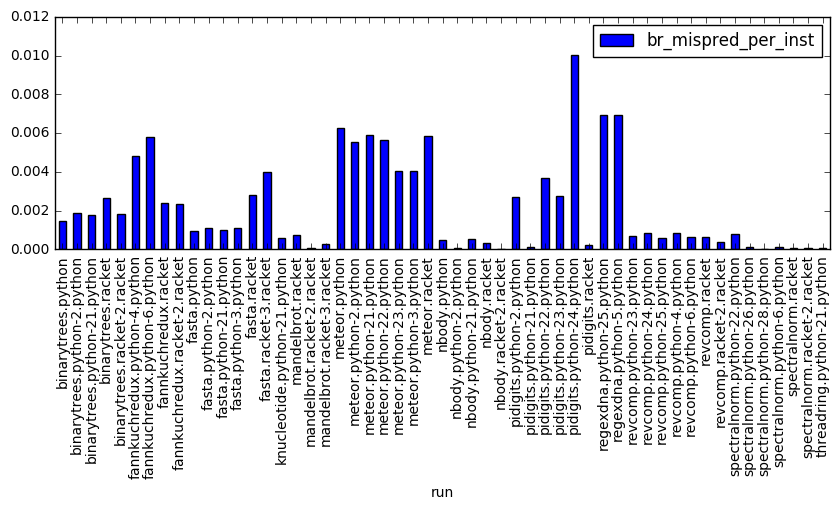

In [38]:
# Plot branch mispredictions / inst
byrun_df.plot(kind="bar", y="br_mispred_per_inst", figsize=(10,3) )

Similarly varied. These are likely pretty small miss rates to begin with, so would be interesting to compare to GCC, CPython etc. Also would be good to look at these at branch mispredictions per phases once I fix the bugs there.